In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import utilities as ut
%load_ext autoreload
%autoreload 2

from IPython.core.display import HTML
HTML('<style>.container { width:97% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

In [8]:
file = "data/conference_SFHH.dat"
file = "data/workplace_contacts.dat"
data_in = ut.load_data(file)
gap = 19

In [14]:
data = data_in[1:101]
splitted_data = ut.split_input_data(data,gap)

In [15]:
nodes = ut.individuals(data)
graphs,pos = ut.build_graphs(data,gap)

/home/antonio/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


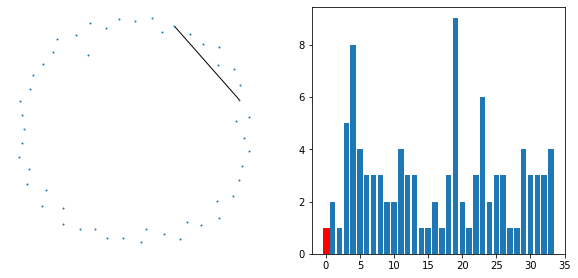

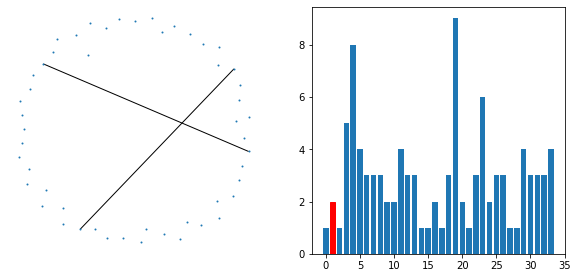

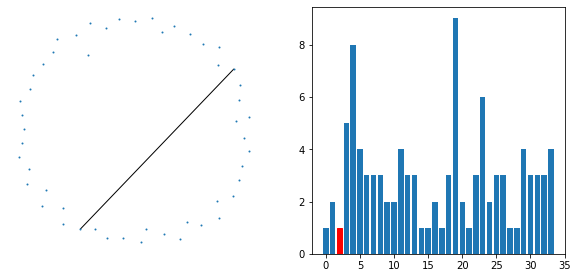

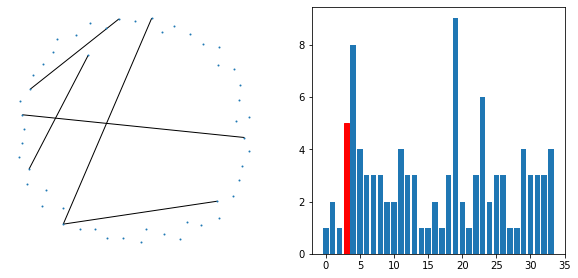

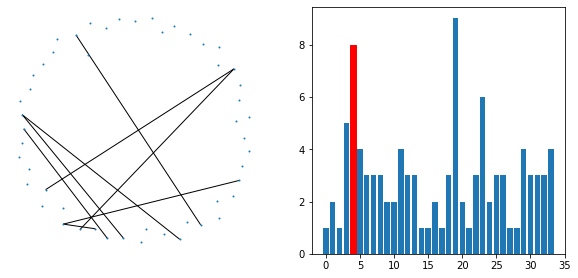

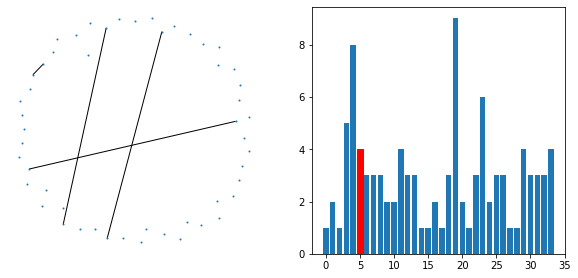

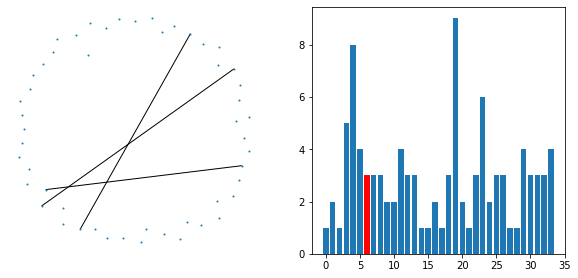

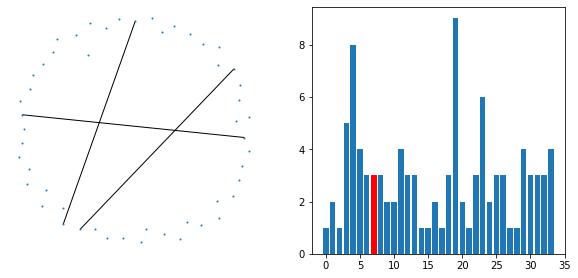

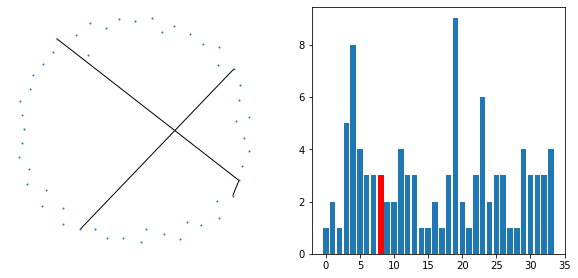

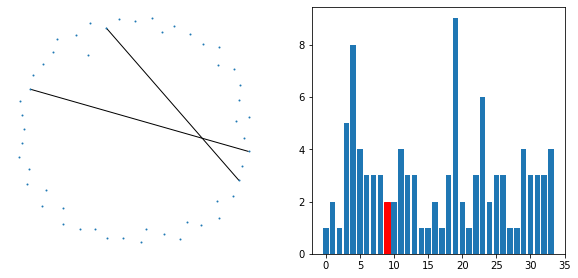

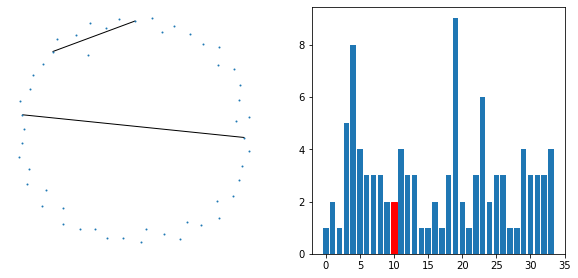

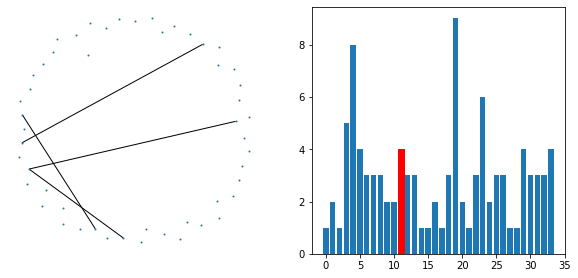

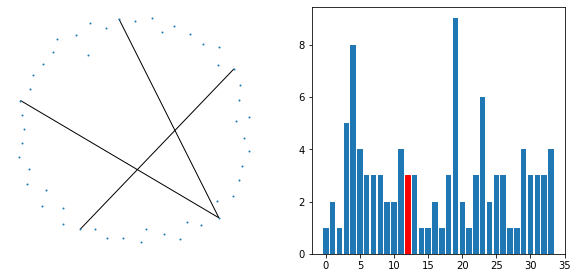

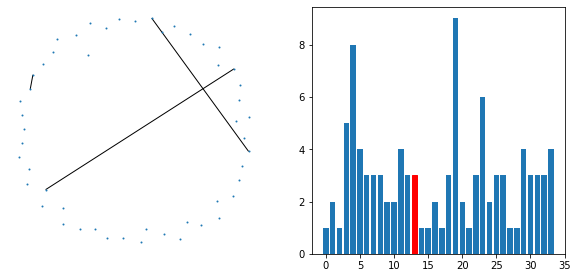

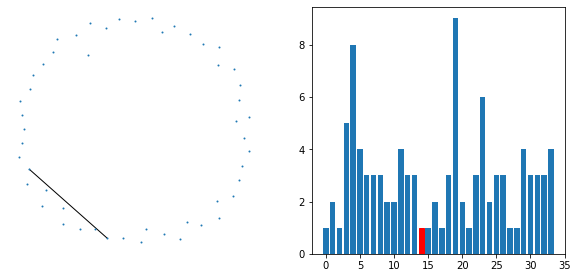

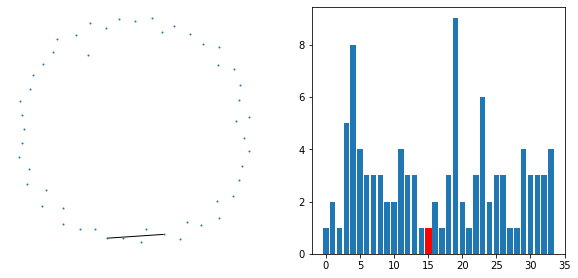

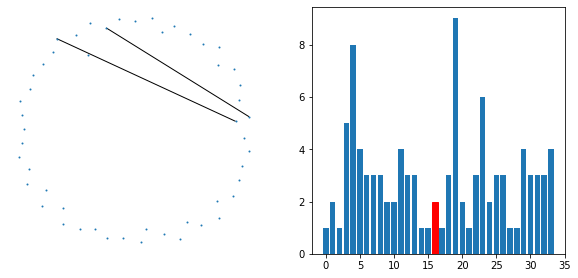

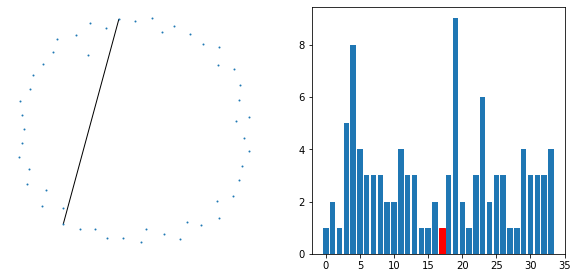

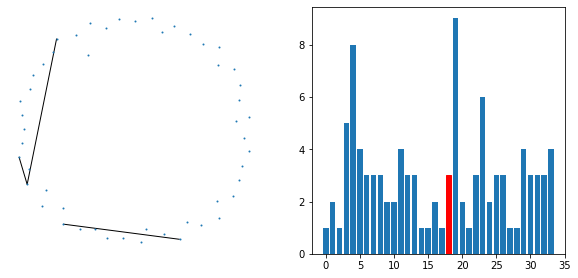

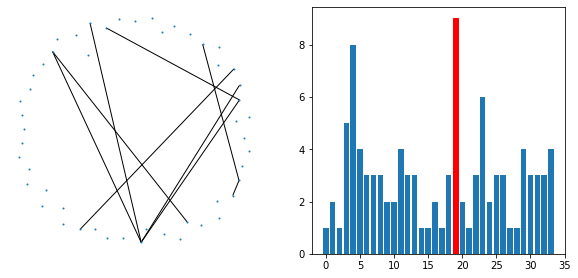

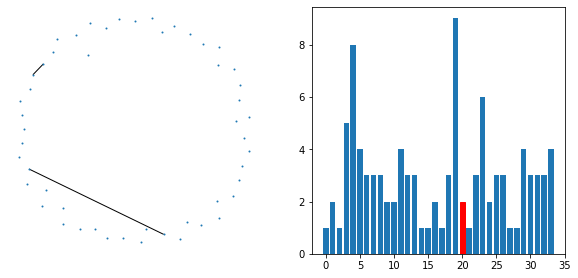

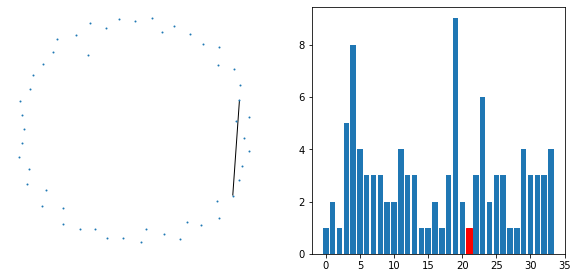

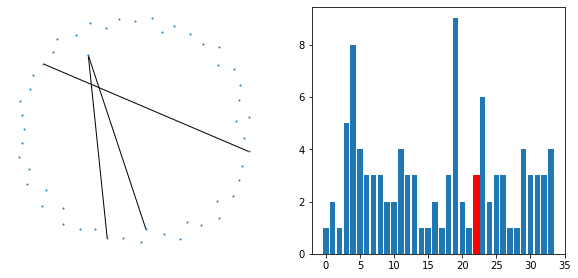

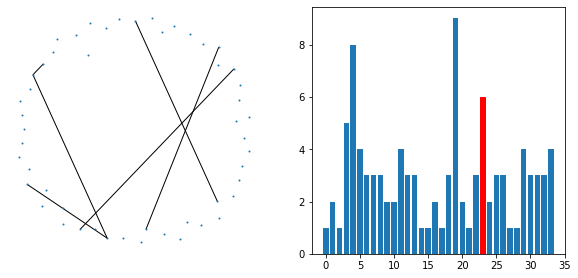

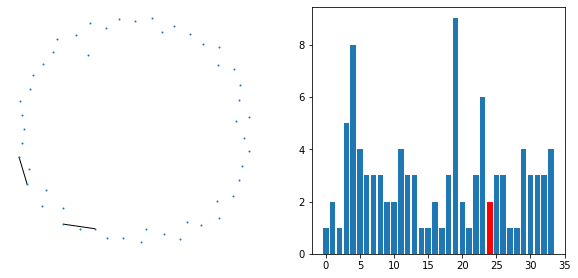

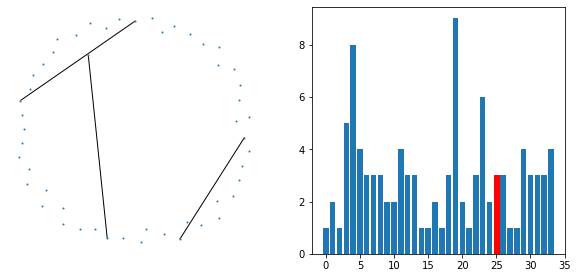

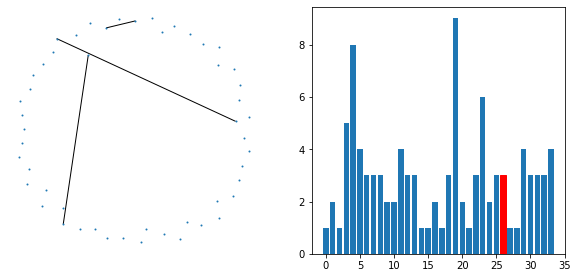

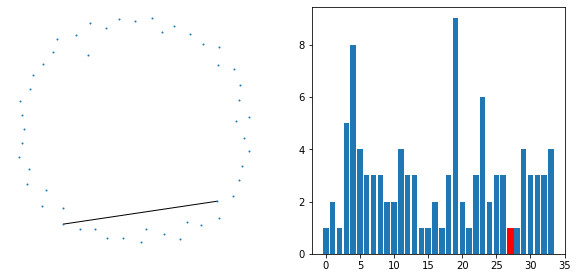

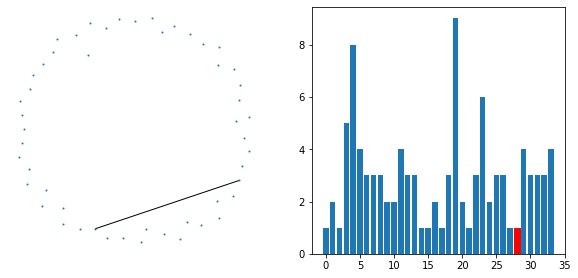

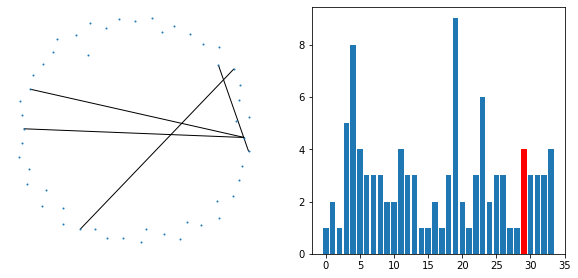

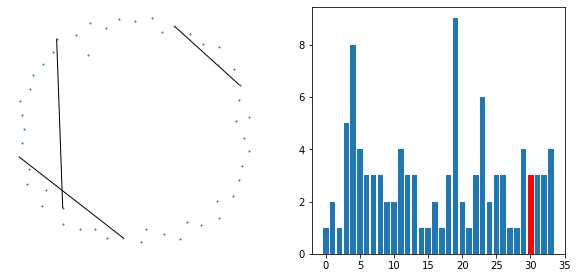

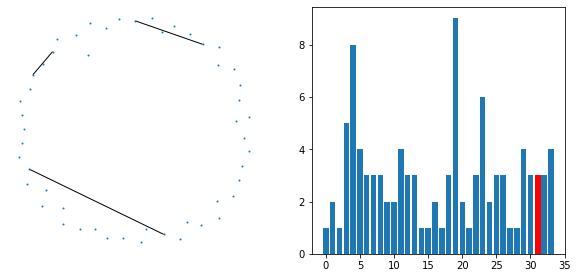

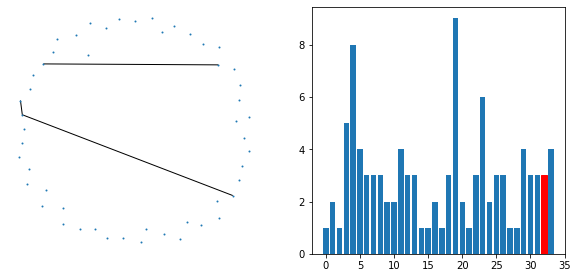

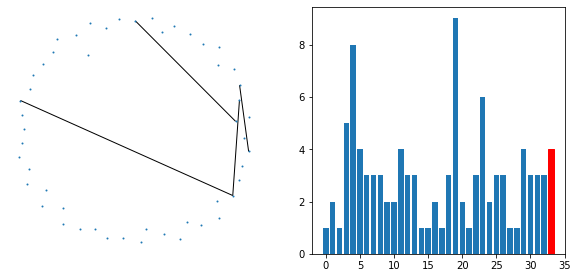

In [19]:
ut.plot_graphs(graphs,splitted_data,pos)

In [21]:
GG = ut.build_weighted_graph(data)

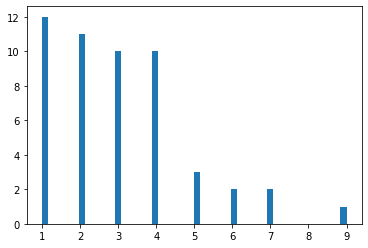

In [22]:
aa= nx.degree(GG)
tt = []

for i,j in list(aa):
    tt.append(j)
    
    
plt.hist(tt,bins=50)
plt.show()

In [ ]:
bb= GG.edges(data=True)
bb[1]

In [ ]:
plot_weighted_graph(GG,pos, node_size=70)

In [ ]:
degree = []
for n in GG.nodes():
    degree.append(GG.degree(n))
    
weights = []
for e in GG.edges():
    weights.append(GG[e[0]][e[1]]["weight"])

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title("weights")
plt.plot(np.flip(np.sort(weights,-1)),"o")
plt.yscale("log")
plt.xscale("log")

plt.subplot(122)
plt.title("degree")
plt.plot(np.flip(np.sort(degree)),"o")

plt.show()

In [ ]:
degree

In [ ]:
def plot_weighted_graph(GG,pos, node_size=70):
    nx.draw_networkx_nodes(GG, pos, node_size=node_size)

    # edges
    for u,v in GG.edges():
        nx.draw_networkx_edges(GG,pos, edgelist=[(u,v)],width=int(GG[u][v]["weight"]))

    plt.axis('off')
    plt.show()

def build_weighted_graph(data):
    nodes = individuals(data)
    G = nx.complete_graph(nodes)
    for e in G.edges():
        G[e[0]][e[1]]["weight"]=0
    for t,i,j in data:
        G[i][j]["weight"] = G[i][j]["weight"] + 1

    GG = G.copy()
    for e in G.edges():
        if (G[e[0]][e[1]]["weight"] == 0):
            GG.remove_edge(e[0],e[1])
    return(GG)

def plot_graphs(graphs,splitted_data):
    c=0
    interaction = [len(i) for i in splitted_data]
    for i in graphs:
        plt.figure(figsize=(10,10))
        plt.subplot(221)
        nx.draw(i,pos=pos, node_size=1,with_labels=False)
        plt.subplot(222)
        barlist = plt.bar(np.arange(len(interaction)),interaction)
        barlist[c].set_color('r')
        plt.show()
        c = c+1
        
def build_graphs(data):
    graphs = []
    G=nx.Graph()
    nodes = individuals(data)
    G.add_nodes_from(nodes)
    pos = nx.spring_layout(G)
    
    for t in splitted_data:
        g = G.copy()
        for _,i,j in t:
            g.add_edge(i,j)
        graphs.append(g)  

    return(graphs,pos)

def split_input_data(data, gap):
    times = data[:,0]
    pos = times[0]
    chunks = []
    for i in range(len(times)):
        if not(times[i]<=(pos + gap)):
            chunks.append(i)
            pos = times[i]

    return(np.split(data,chunks))

def load_data(path):
    with open(path) as f:
        data = [[int(x) for x in line.split()] for line in f]
    data = np.array(data)
    return(data)
def individuals(data):
    return(np.unique(data[:,1:]))